## Weather Data Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [2]:
# Import the dataset
dataset = pd.read_csv('./dataset/minute_weather.csv')

In [3]:
print(dataset.shape)
dataset.head()

(1587257, 13)


,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


## Preprocess the dataset

Since we have a large number of rows, we sample the dataset by taking only the data having rowID divisible by 10, thus reducing its size by 90%

In [4]:
sampled_df = dataset[(dataset['rowID'] % 10) == 0]
sampled_df.shape

(158726, 13)

In [5]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [6]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [7]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(157237, 13)

In [8]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [9]:
sampled_df.shape

(158726, 11)

In [10]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]
print(f'Dropped {rows_before - rows_after} rows.')

Dropped 46 rows.


In [11]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [12]:
# Select relevant features for clustering
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [13]:
select_df = sampled_df[features]

In [14]:
select_df.shape

(158680, 7)

In [15]:
select_df.columns

Index(['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed',
       'max_wind_direction', 'max_wind_speed', 'relative_humidity'],
      dtype='object')

In [16]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(select_df)

## Train the model

In [17]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1,25)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

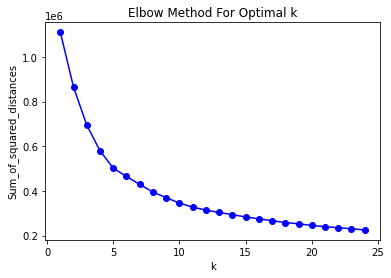

In [18]:
plt.plot(K, sum_of_squared_distances, 'bo-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [19]:
km = KMeans(n_clusters=12)
model = km.fit(X)
print(model)

KMeans(n_clusters=12)


## Analysing the clusters formed

In [20]:
centers = model.cluster_centers_
centers

array([[ 1.20976957e+00, -9.67759940e-02, -1.13590723e+00,
         1.02527650e+00, -1.02390443e+00,  1.10353231e+00,
        -1.06220795e+00],
       [-1.70888338e-01,  6.13977038e-01,  4.10581314e-01,
         6.64584602e-01,  5.19809757e-01,  6.06480707e-01,
        -1.79148584e-01],
       [-1.15262339e+00, -8.79028685e-01,  4.44255243e-01,
         1.92238732e+00,  5.38085199e-01,  1.88303258e+00,
         9.19968778e-01],
       [-2.38200033e-01,  8.91270304e-01, -1.30886462e+00,
        -5.74321044e-01, -1.16937891e+00, -5.90729436e-01,
        -6.08731099e-01],
       [ 1.43851837e-03, -7.82801682e-01, -1.18361652e+00,
        -5.69158944e-01, -1.03049504e+00, -5.84117342e-01,
         9.16214968e-01],
       [ 1.32215313e+00, -7.65268131e-02, -1.10953981e+00,
        -4.59480135e-01, -9.49070025e-01, -4.57379993e-01,
        -9.10438653e-01],
       [-8.76981822e-01, -1.14909956e+00,  3.72116757e-01,
         2.43526898e-01,  4.73473069e-01,  2.32548817e-01,
         1.3446301

In [21]:
# Function that creates a DataFrame with a column for Cluster Number
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [22]:
from itertools import cycle, islice

# Function that creates Parallel Plots
def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [23]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,1.209770,-0.096776,-1.135907,1.025276,-1.023904,1.103532,-1.062208,0
1,-0.170888,0.613977,0.410581,0.664585,0.519810,0.606481,-0.179149,1
2,-1.152623,-0.879029,0.444255,1.922387,0.538085,1.883033,0.919969,2
3,-0.238200,0.891270,-1.308865,-0.574321,-1.169379,-0.590729,-0.608731,3
4,0.001439,-0.782802,-1.183617,-0.569159,-1.030495,-0.584117,0.916215,4
5,1.322153,-0.076527,-1.109540,-0.459480,-0.949070,-0.457380,-0.910439,5
6,-0.876982,-1.149100,0.372117,0.243527,0.473473,0.232549,1.344630,6
7,0.297823,0.784674,1.316565,-0.631118,1.579153,-0.582381,-0.752344,7
8,-0.267030,0.606628,0.200492,-0.625437,0.373640,-0.639656,-0.379622,8
9,0.235248,0.320006,1.887842,-0.651982,-1.551268,-0.576714,-0.283487,9


## Dry days

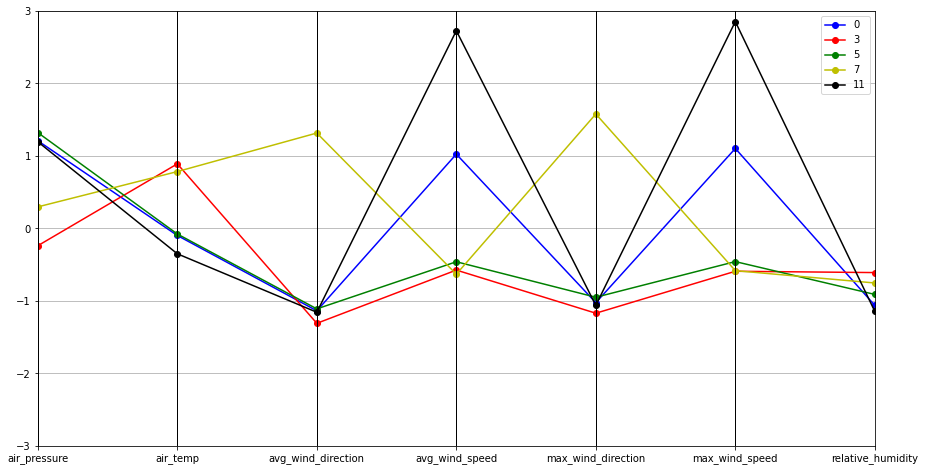

In [24]:
parallel_plot(P[P['relative_humidity'] < -0.5])

## Warm days

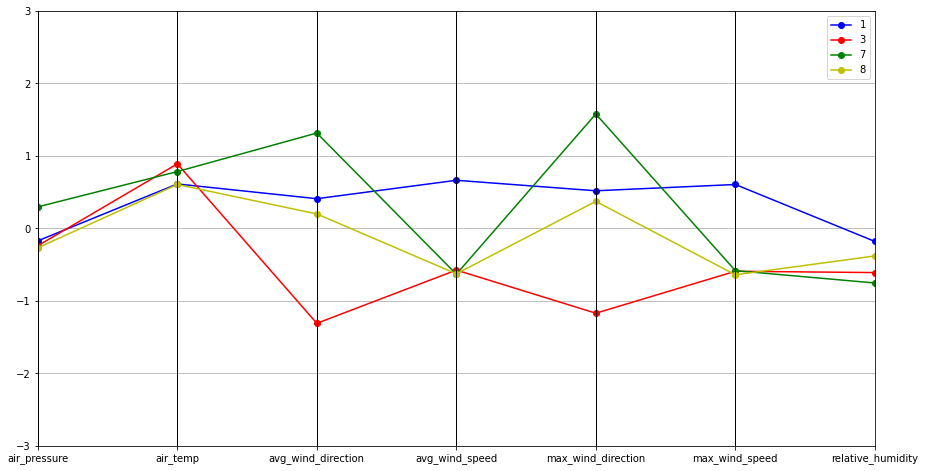

In [25]:
parallel_plot(P[P['air_temp'] > 0.5])

## Cool days

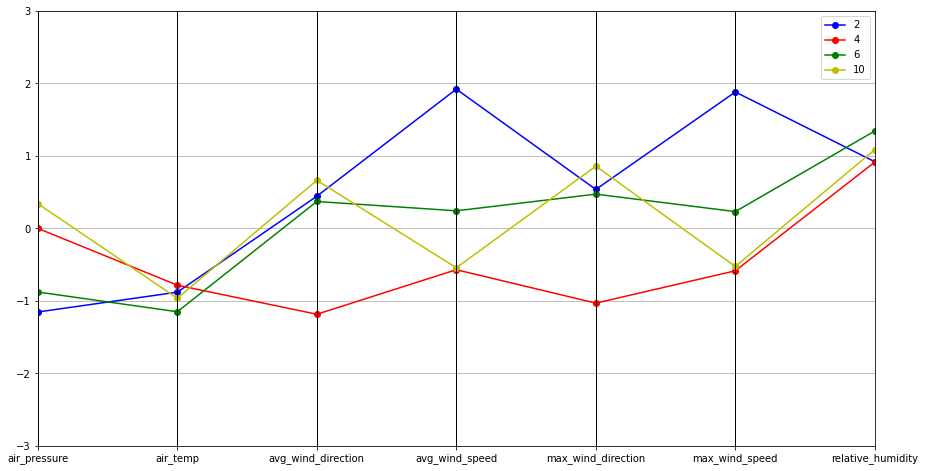

In [26]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])